In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import warnings
warnings.simplefilter("ignore")

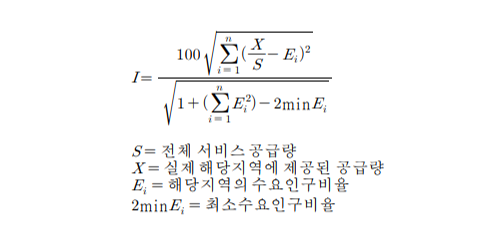

In [2]:
# 비형평계수 식
Image('비형평계수.png')

In [3]:
# S = 전체 서비스 공급량 데이터 불러오기
S = pd.read_csv('../전처리된데이터/시군구별_공급.csv', index_col = 0)
S = S.iloc[:, -1]
S = sum(S)
S

8491

In [4]:
# X = 실제 해당 지역에 제공된 공급량
X = pd.read_csv('../전처리된데이터/시군구별_공급.csv', index_col = 0)
X = X.iloc[:, -1]
X

법정동코드
1111000000      0
1114000000    242
1117000000     94
1120000000      0
1121500000      0
             ... 
4887000000      0
4888000000      0
4889000000      0
5011000000      0
5013000000      0
Name: 노인복지주택_정원, Length: 229, dtype: int64

In [5]:
# E = 해당 지역의 수요 인구 비율
E = pd.read_csv('../전처리된데이터/시군구별_수요.csv', index_col = 0)
E = E.iloc[:, -1]
E

법정동코드
1111000000    0.275060
1114000000    0.283253
1117000000    0.251150
1120000000    0.243468
1121500000    0.230441
                ...   
4887000000    0.469933
4888000000    0.395169
4889000000    0.541688
5011000000    0.224443
5013000000    0.288131
Name: 60세이상_비율, Length: 229, dtype: float64

In [6]:
# min_E = 최소 수요 인구 비율
min_E = min(E)
min_E

0.1509005070816576

In [7]:
# 분자 식 구현
U = 0
for i in range(len(X)):
    U += (X / S - E) ** 2
    
U = 100 * np.sqrt(U)
U

법정동코드
1111000000    416.240911
1114000000    385.510643
1117000000    363.305450
1120000000    368.434434
1121500000    348.720221
                 ...    
4887000000    711.137066
4888000000    597.999840
4889000000    819.723059
5011000000    339.644047
5013000000    436.021604
Length: 229, dtype: float64

In [8]:
# 분모 식 구현
D = 0
for i in range(len(E)):
    D += E ** 2
    
D = np.sqrt(1 + D - 2 * min_E)
D

법정동코드
1111000000    4.245450
1114000000    4.367085
1117000000    3.891353
1120000000    3.777908
1121500000    3.585914
                ...   
4887000000    7.160293
4888000000    6.038094
4889000000    8.239708
5011000000    3.497715
5013000000    4.439559
Name: 60세이상_비율, Length: 229, dtype: float64

In [9]:
# 분자 / 분모 형태로 값 산출
I = U / D
I

법정동코드
1111000000    98.043995
1114000000    88.276415
1117000000    93.362256
1120000000    97.523389
1121500000    97.247239
                ...    
4887000000    99.316759
4888000000    99.037848
4889000000    99.484479
5011000000    97.104565
5013000000    98.212822
Length: 229, dtype: float64

In [10]:
# 시군구별 비형평계수 파일 반환 (분석 배경에 활용)
I.to_csv('../전처리된데이터/시군구별_비형평계수.csv')